In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from scripts import utils
from scripts import sisfall, classifiers

In [3]:
df, mean, aggr = classifiers.cross_validate(sisfall, models_subset=['ExtraTrees', 'LogisticCV'], cv=2)
df


Fold 0 --------------
Train set: X: (5770, 1400), y: (5770,)        ([ADLs, Falls]) [5571  199]
Test set: X: (6273, 1400), y: (6273,)        ([ADLs, Falls]) [5272 1001]


2024-06-11 10:27:42.092451: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-11 10:27:42.116411: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 10:27:42.502801: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


> ExtraTrees        (win_size=5500)	Training/Testing in 0.76 secs.
> LogisticCV        (win_size=5500)	Training/Testing 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


in 17.43 secs.

Fold 1 --------------
Train set: X: (6641, 1400), y: (6641,)        ([ADLs, Falls]) [5596 1045]
Test set: X: (5402, 1400), y: (5402,)        ([ADLs, Falls]) [5247  155]
> ExtraTrees        (win_size=5500)	Training/Testing in 0.78 secs.
> LogisticCV        (win_size=5500)	Training/Testing in 8.78 secs.


,model,window_size,runtime,precision,recall,f1-score,fold
0,ExtraTrees,5500,0.76,0.96,0.44,0.60,0
1,LogisticCV,5500,17.43,0.00,0.00,0.00,0
2,ExtraTrees,5500,0.78,0.51,0.74,0.61,1
3,LogisticCV,5500,8.78,0.11,0.19,0.14,1


In [4]:
aggr

,model,window_size,runtime,precision,recall,f1-score
0,ExtraTrees,5500.0$\pm$0.0,0.77$\pm$0.01,0.74$\pm$0.32,0.59$\pm$0.21,0.6$\pm$0.01
1,LogisticCV,5500.0$\pm$0.0,13.1$\pm$6.12,0.06$\pm$0.08,0.1$\pm$0.13,0.07$\pm$0.1


Train set: X: (8245, 1400), y: (8245,)    ([ADLs, Falls]) [7364  881]
Test set: X: (3798, 1400), y: (3798,)    ([ADLs, Falls]) [3479  319]


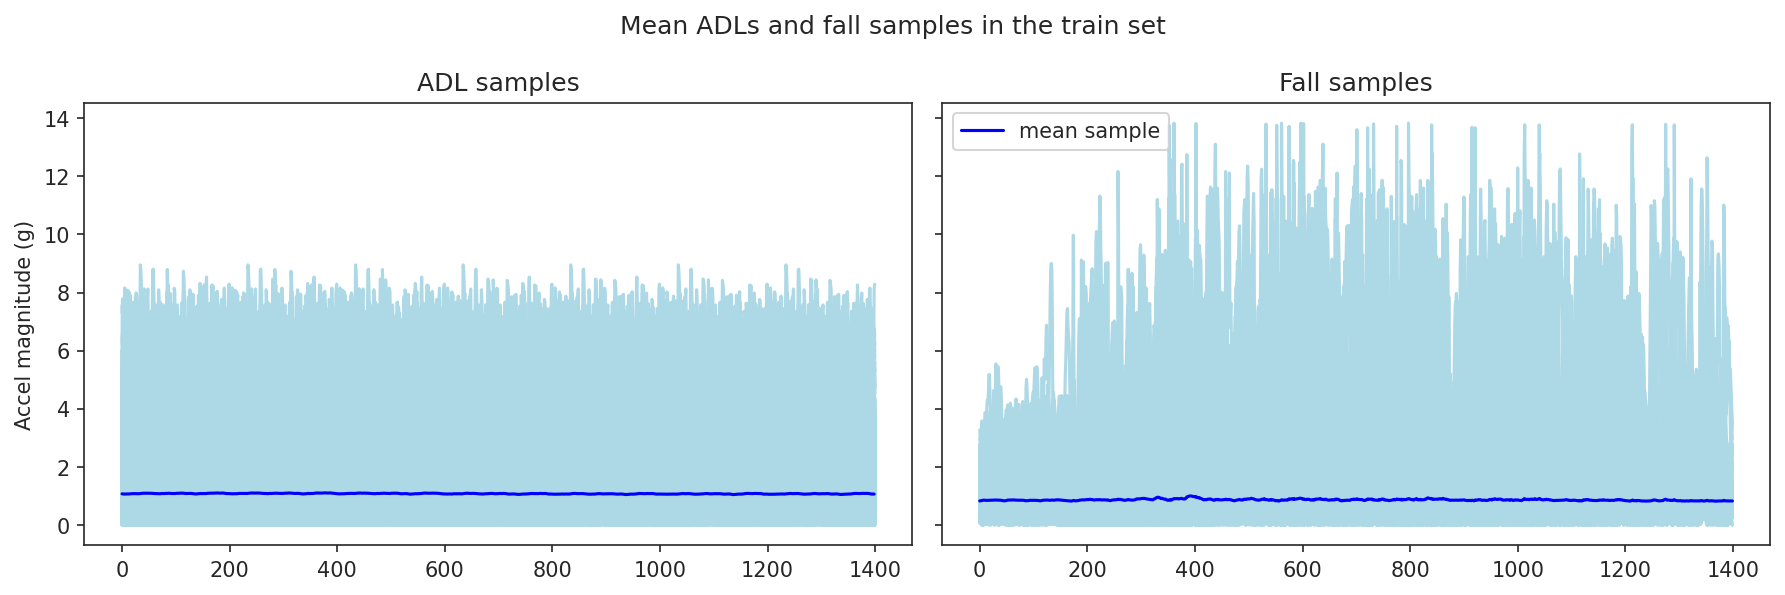

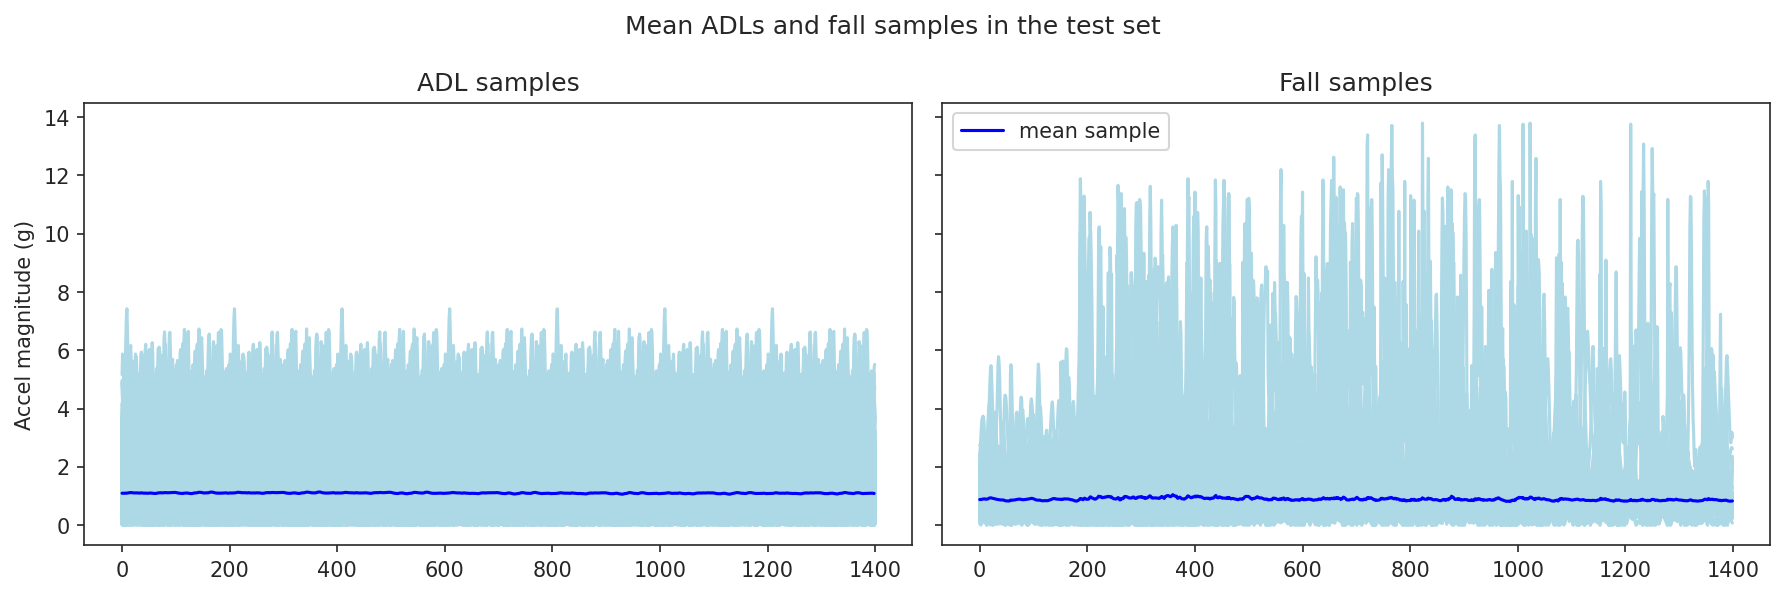

In [2]:
X_train, y_train, X_test, y_test = sisfall.train_test_subjects_split()

In [4]:
tabular_metrics = classifiers.run_tabular_models(
  X_train, y_train, X_test, y_test, freq=200, s=7)

> LogisticCV        (win_size=1400)	Training/Testing in 21.67 secs.
> RandomForest      (win_size=1400)	Training/Testing in 37.3 secs.
> KNN               (win_size=1400)	Training/Testing in 1.23 secs.
> RidgeCV           (win_size=1400)	Training/Testing in 1.37 secs.
> ExtraTrees        (win_size=1400)	Training/Testing in 0.9 secs.


In [5]:
tabular_metrics.to_csv(r'results/tabular_sisfall_7.csv')
tabular_metrics

,model,window_size,runtime,precision,recall,f1-score
0,LogisticCV,1400,21.666906,0.466667,0.109718,0.177665
1,RandomForest,1400,37.296199,0.904167,0.680251,0.776386
2,KNN,1400,1.228297,0.817308,0.799373,0.808241
3,RidgeCV,1400,1.367292,1.000000,0.037618,0.072508
4,ExtraTrees,1400,0.901741,0.903704,0.764890,0.828523


In [6]:
ts_metrics = classifiers.run_ts_models(
  X_train, y_train, X_test, y_test, freq=200, s=7)

2024-06-05 11:21:23.050578: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-05 11:21:23.077018: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 11:21:32.753705: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


> Hydra             (win_size=1400)	Training/Testing in 325.55 secs.
> Rocket            (win_size=1400)	Training/Testing in 288.37 secs.
> MultiRocketHydra  (win_size=1400)	Training/Testing in 418.48 secs.
> Catch22           (win_size=1400)	Training/Testing in 47.82 secs.
> QUANT             (win_size=1400)	Training/Testing in 197.57 secs.
> FCN               (win_size=1400)	Training

2024-06-05 11:43:01.470596: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
in 2057.63 secs.


In [7]:
ts_metrics.to_csv(r'results/ts_sisfall_7.csv')
ts_metrics

,model,window_size,runtime,precision,recall,f1-score
0,Hydra,1400,325.549394,0.952830,0.949843,0.951334
1,Rocket,1400,288.373684,0.937107,0.934169,0.935636
2,MultiRocketHydra,1400,418.477497,0.990164,0.946708,0.967949
3,Catch22,1400,47.815427,0.983108,0.912226,0.946341
4,QUANT,1400,197.569206,0.990066,0.937304,0.962963
5,FCN,1400,2057.630995,0.929936,0.915361,0.922591
